In [1]:
import pandas as pd
import numpy as np
from pycaret.regression import * 
import matplotlib.pyplot as plt
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pmdarima as pm

In [2]:
from statsmodels.tsa.stattools import acf

In [3]:
data = pd.read_csv('epidemiology.csv')

In [4]:
data.shape

(1048575, 10)

In [5]:
data['date'] = pd.to_datetime(data['date'],format='%d-%m-%Y' )
# sorted_data=data.sort_values(by=['date'])
# sorted_data

In [23]:
location1=data.loc[data['location_key'] == "AD"]
location1

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,2020-01-01,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,2020-01-02,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2,2020-01-03,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
3,2020-01-04,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
4,2020-01-05,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
982,2022-09-09,AD,0.0,0.0,NaN,NaN,46113.0,155.0,NaN,NaN
983,2022-09-10,AD,0.0,0.0,NaN,NaN,46113.0,155.0,NaN,NaN
984,2022-09-11,AD,0.0,0.0,NaN,NaN,46113.0,155.0,NaN,NaN
985,2022-09-12,AD,0.0,0.0,NaN,NaN,46113.0,155.0,NaN,NaN


In [126]:
location1.to_csv("dummy.csv")

<AxesSubplot: xlabel='date', ylabel='cumulative_deceased'>

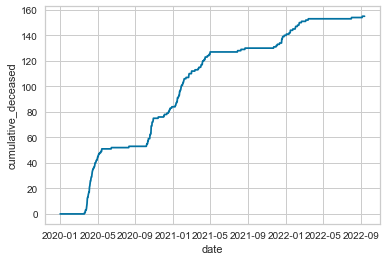

In [7]:
import seaborn as sns
sns.lineplot(data=location1,x="date",y="cumulative_deceased")

In [26]:
location1.drop('location_key',axis=1,inplace=True)
location1.drop('cumulative_confirmed',axis=1,inplace=True)
location1.drop('new_tested',axis=1,inplace=True)
location1.drop('new_recovered',axis=1,inplace=True)
location1.drop('new_deceased',axis=1,inplace=True)
location1.drop('new_confirmed',axis=1,inplace=True)
location1.drop('cumulative_tested',axis=1,inplace=True)
location1.drop('cumulative_recovered',axis=1,inplace=True)

In [27]:
location1

,date,cumulative_deceased
0,2020-01-01,0.0
1,2020-01-02,0.0
2,2020-01-03,0.0
3,2020-01-04,0.0
4,2020-01-05,0.0
...,...,...
835,2022-04-15,153.0
836,2022-04-16,153.0
837,2022-04-17,153.0
838,2022-04-18,153.0


<AxesSubplot: xlabel='date', ylabel='cumulative_deceased'>

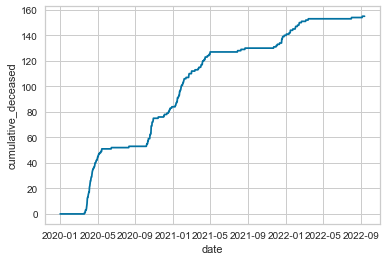

In [10]:
import seaborn as sns
sns.lineplot(data=location1,x="date",y="cumulative_deceased")

In [29]:
location1.set_index('date', inplace=True)
location1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 840 entries, 2020-01-01 to 2022-04-19
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cumulative_deceased  840 non-null    float64
dtypes: float64(1)
memory usage: 13.1 KB


In [30]:
location1= location1[:840]

<AxesSubplot: xlabel='date'>

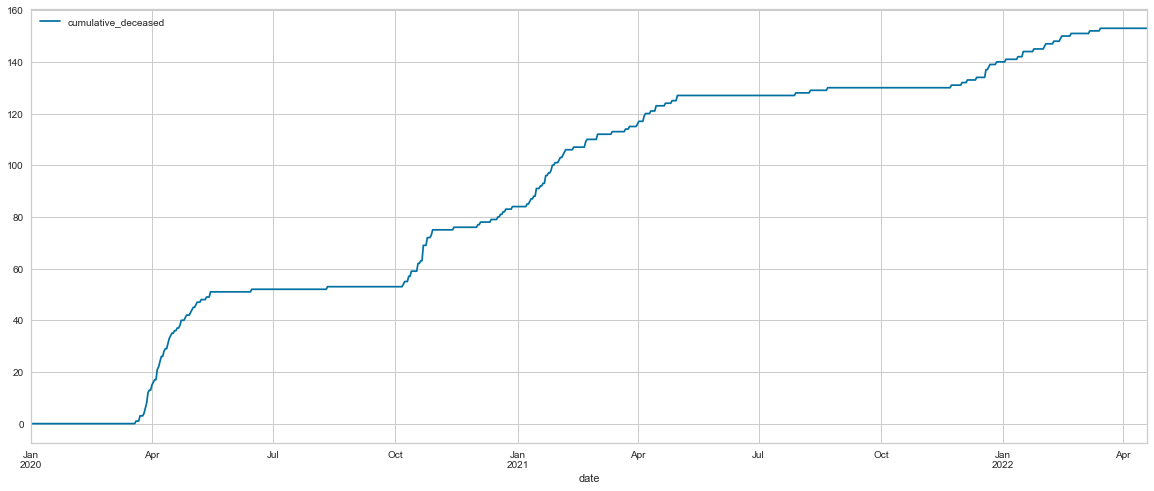

In [31]:
location1.plot(figsize=(20,8))

In [ ]:
# sorted_data=location1.sort_values(by=['date'])
# sorted_data

In [124]:
# filtered_sub1=pd.DataFrame().assign(date=sorted_data['date'], cumulative_deceased=sorted_data['cumulative_deceased'])

In [9]:
# filtered_sub1.drop('stringency_index',axis=1,inplace=True)
# filtered_sub1.drop('cumulative_persons_fully_vaccinated',axis=1,inplace=True)
# filtered_sub1.drop('cumulative_confirmed',axis=1,inplace=True)
# filtered_sub1.drop('average_temperature_celsius',axis=1,inplace=True)
# filtered_sub1.drop('population',axis=1,inplace=True)
# filtered_sub1.drop('population_density',axis=1,inplace=True)
# filtered_sub1.drop('gdp_per_capita_usd',axis=1,inplace=True)
# filtered_sub1.drop('location_key',axis=1,inplace=True)
# filtered_sub1.drop('country_name',axis=1,inplace=True)
# filtered_sub1.drop('subregion1_code',axis=1,inplace=True)

In [136]:
# location1.to_csv("dummy.csv")

In [93]:
# filtered_sub1.plot()

<AxesSubplot: xlabel='date'>

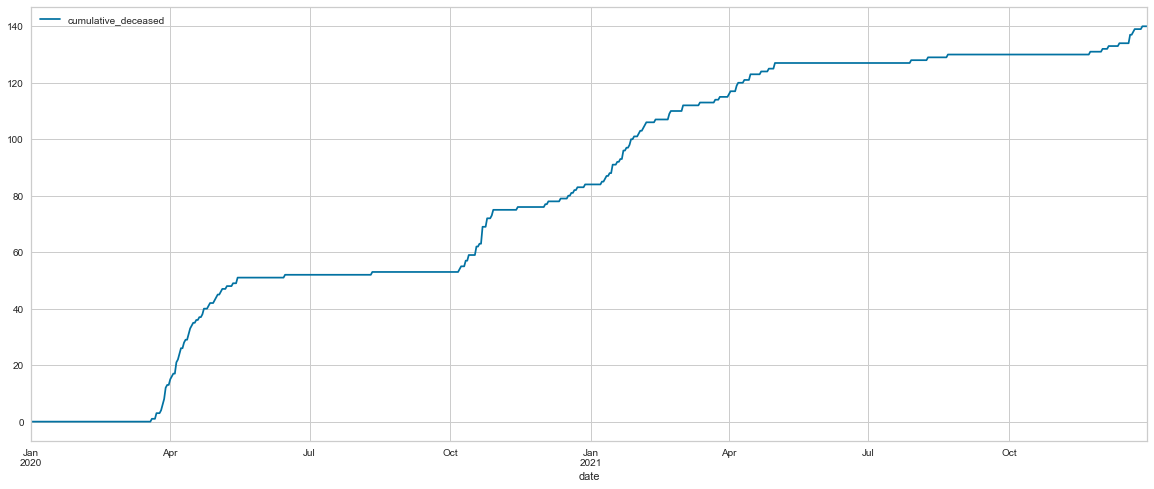

In [36]:
train.plot(figsize=(20,8))

In [94]:
# filtered_sub1.set_index('date', inplace=True)
# filtered_sub1.info()

In [95]:
# train.index.values

In [35]:
train= location1[:730]
test= location1[730:]

In [37]:
test.shape

(110, 1)

In [49]:
smodel = pm.auto_arima(train, start_p=1, start_q=1,
                         test='kpss',
                         max_p=3, max_q=3, m=7,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=1247.040, Time=1.01 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1424.040, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1347.304, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=1251.856, Time=0.40 sec
 ARIMA(1,1,1)(0,1,0)[7]             : AIC=1426.967, Time=0.35 sec
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=inf, Time=3.14 sec
 ARIMA(1,1,1)(0,1,2)[7]             : AIC=inf, Time=4.31 sec
 ARIMA(1,1,1)(1,1,0)[7]             : AIC=1343.798, Time=0.88 sec
 ARIMA(1,1,1)(1,1,2)[7]             : AIC=inf, Time=4.30 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=1251.084, Time=0.36 sec
 ARIMA(2,1,1)(0,1,1)[7]             : AIC=inf, Time=2.77 sec
 ARIMA(1,1,2)(0,1,1)[7]             : AIC=inf, Time=3.62 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=1252.661, Time=0.31 sec
 ARIMA(0,1,2)(0,1,1)[7]             : AIC=1245.352, Time=0.53 sec
 ARIMA(0,1,2)(0,1,0)[7]             : AIC=1424.548, Time=0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  730
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 7)   Log Likelihood                -618.676
Date:                             Wed, 08 Feb 2023   AIC                           1245.352
Time:                                     10:45:32   BIC                           1263.681
Sample:                                          0   HQIC                          1252.427
                                             - 730                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0406      0.031      1.320      0.187      -0.020       0.101
ma.L2          0.1017      0.026      3.952      0.000       0.051       0.152
ma.S.L7       -0.7799      0.013    -61.760      0.000      -0.805      -0.755
sigma2         0.3220      0.005     63.195      0.000       0.312       0.332
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):             15313.74
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                             3.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
#fitted, conf_int = smodel.predict_in_sample(return_conf_int=True, alpha=0.05)

In [51]:
# hd_series = pd.Series(fitted[1:], index=test.index[1:])
# hdlower_series = pd.Series(conf_int[1:, 0], index=test.index[1:])
# hdupper_series = pd.Series(conf_int[1:, 1], index=test.index[1:])

# plt.plot(hd_series,color='red')
# plt.fill_between(hdlower_series.index,
# hdlower_series,
# hdupper_series,
# color='k', alpha=.15)
# plt.show()

In [124]:
n_periods = 110
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
#index_of_fc=test.index
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='D')

In [125]:
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

<AxesSubplot: xlabel='date'>

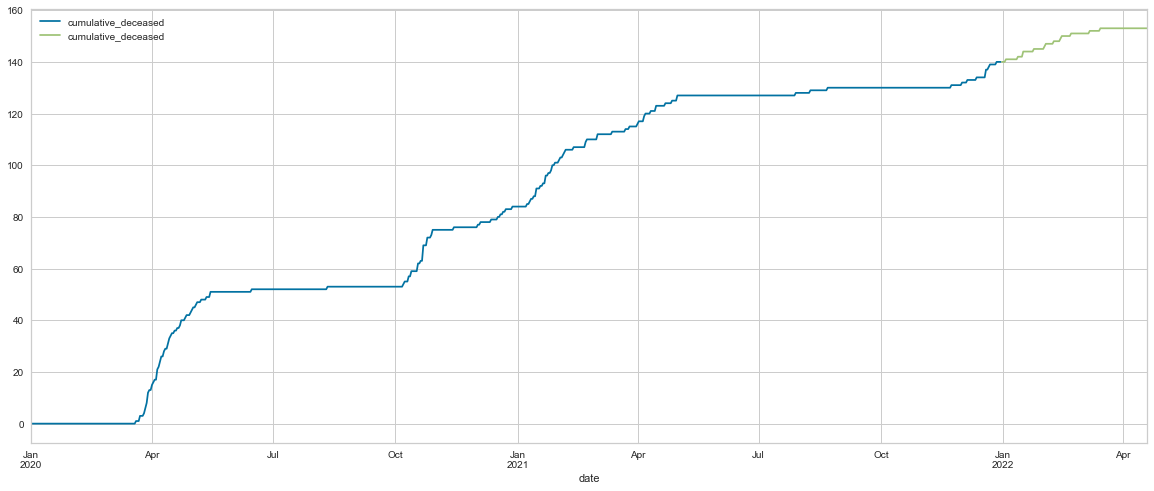

In [126]:
ax = train.plot()
test.plot(figsize=(20,8),ax=ax)

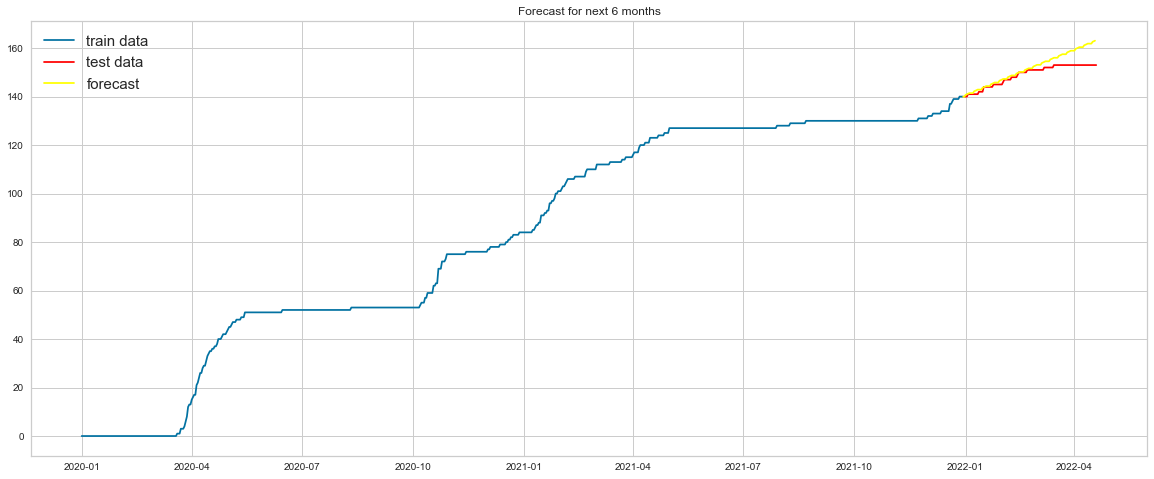

In [127]:
plt.figure(figsize=(20,8))
plt.plot(train, label='train data')
plt.plot(test, color='red', label='test data')
plt.plot(fitted_series, color='yellow',label='forecast')
# plt.fill_between(lower_series.index, 
#                  lower_series, 
#                  upper_series, 
#                  color='k', alpha=.15)
plt.legend(loc='upper left', fontsize=15)
plt.title("Forecast for next 6 months")
plt.show()

In [128]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,  
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fitted, test.values.ravel())

{'mape': 0.01776135169662837,
 'me': 2.678790976428184,
 'mae': 2.6973478001475413,
 'mpe': 0.017633954617406515,
 'rmse': 3.9305748589979466,
 'corr': 0.9458130121669871,
 'minmax': 0.017129061859700867}

In [96]:
# fitted.tolist()

In [97]:
# test.values.ravel()

In [130]:
# model1=ARIMA(train,order=(2,2,2))
# fitted=model1.fit()
# fitted.summary()

In [118]:
# predicted=fitted.forecast(500)

In [129]:
# predicted.plot(figsize=(20,8))